# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [1]:
ls

CONTRIBUTING.md    README.md          halfway-there.gif
LICENSE.md         data/              student.ipynb


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
df = pd.read_csv('data/kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Cleaning

### sqft_basement

sqft_basement is type object - convert to type int

In [7]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
207.0         1
2390.0        1
1852.0        1
2240.0        1
283.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [8]:
df['sqft_basement'].value_counts() / len(df['sqft_basement'])

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
207.0     0.000046
2390.0    0.000046
1852.0    0.000046
2240.0    0.000046
283.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

There seems to be some '?' as a value for sqft_basement (around 2% of values) and we know that sqft_living and sqft_above don't have '?' values because the data-type for these are int64

Instead of dropping these, remember that the sqft_basement and sqft_above variables should add up to sqft_living.
So, make sqft_basement for these '?' values to be (sqft_living - sqft_above)

In [9]:
# Test run
df_basement_test = df

In [10]:
df_basement_test['sqft_basement_test'] = df_basement_test['sqft_living'] - df_basement_test['sqft_above']

In [11]:
df_basement_test['sqft_basement_test']

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement_test, Length: 21597, dtype: int64

In [12]:
df_basement_test['sqft_basement_test'].value_counts() / len(df_basement_test['sqft_basement_test'])

0       0.607029
600     0.010233
700     0.010094
500     0.009909
800     0.009538
          ...   
792     0.000046
2590    0.000046
935     0.000046
2390    0.000046
248     0.000046
Name: sqft_basement_test, Length: 306, dtype: float64

No more '?' values, we can now replace sqft_basement with new values

In [13]:
df = df.assign(sqft_basement=df_basement_test['sqft_basement_test'])

In [14]:
df['sqft_basement'].value_counts() / len(df['sqft_basement'])

0       0.607029
600     0.010233
700     0.010094
500     0.009909
800     0.009538
          ...   
792     0.000046
2590    0.000046
935     0.000046
2390    0.000046
248     0.000046
Name: sqft_basement, Length: 306, dtype: float64

In [15]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_basement_test'],
      dtype='object')

In [19]:
df.drop('sqft_basement_test', axis=1, inplace=True)

### sq_ft living

In [20]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.323799,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.302808,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.283440,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.015418,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,0.087884,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,0.274887,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


<AxesSubplot:>

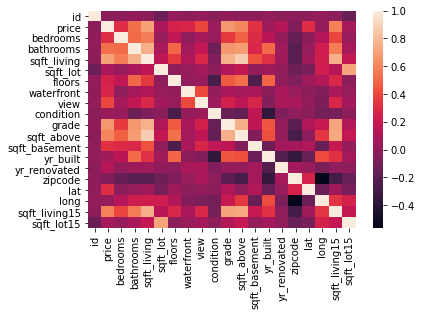

In [21]:
sns.heatmap(df.corr())

sqft_living and sqft_above have a high colinearity of .876 -> drop sqft_living

In [46]:
df.drop('sqft_living', axis=1, inplace=True)

### Waterfront and yr_renovated

There seem to be missing values in waterfront and yr_renovated - makes sense because not all houses will have waterfronts or be renovated

Investigate waterfront further:

In [22]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [26]:
df['waterfront'].isna().sum() / len(df['waterfront'])

0.11001527989998611

Waterfront seems to be described as 1 or 0, indicating whether the house has a waterfront (1) or does not have one (0). If not specifically mentioned (NaN), assume there is no waterfront.

In [27]:
df['waterfront'] = df['waterfront'].fillna(0)

In [28]:
df['waterfront'].isna().sum() / len(df['waterfront'])

0.0

0 seems to be used in a similar way to yr_renovated, so repeat the process with yr_renovated

In [34]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [35]:
df['yr_renovated'].isna().sum()

3842

In [36]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [37]:
df['yr_renovated'].isna().sum() / len(df['yr_renovated'])

0.0

### date

Replace 'date' column with month only -> makes it easier to view as a categorical variable

In [39]:
df['date_dateformat'] = pd.to_datetime(df['date'])

In [40]:
df['month'] = df.date_dateformat.dt.month

In [42]:
df['month'].unique()

array([10, 12,  2,  5,  6,  1,  4,  3,  7,  8, 11,  9])

In [43]:
df.drop('date_dateformat', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)

## Categorical Variables

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'cent

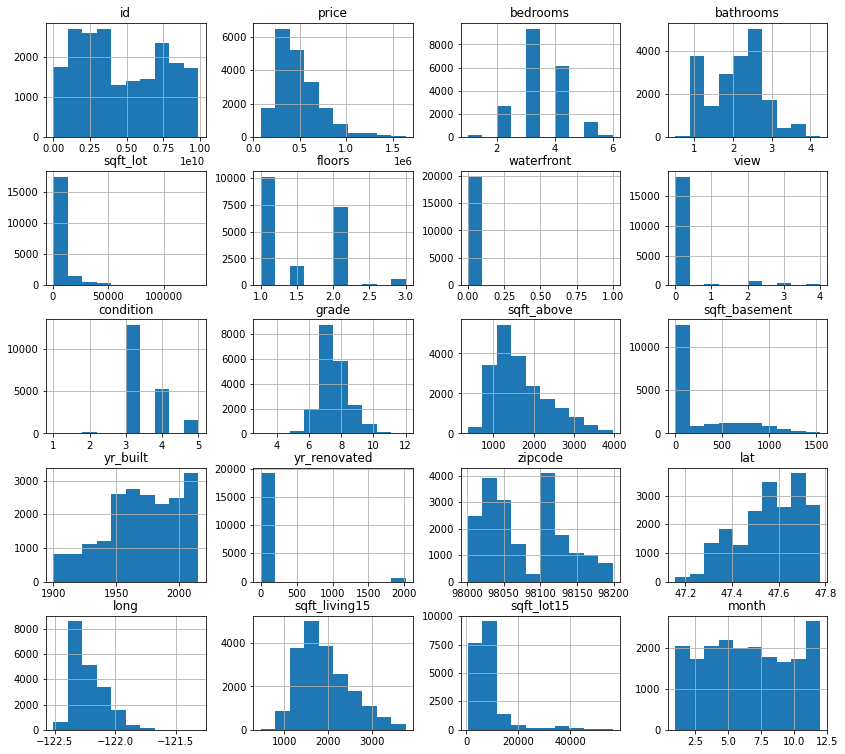

In [58]:
df.hist(figsize=(14,13))

Now, decide which variables are categorical and thus need dummy columns

**Categorical Variables**
- id: identifyer
- waterfront: indicates whether a house has a waterfront or not
- view: indicates whether a house has been viewed
- condition: finite grading scale
- grade: finite grading scale
- zipcode: zipcodes are finite categories
- month: finite 1-12 month

In [59]:
# create dummy columns for each
waterfront_dummy = pd.get_dummies(df['waterfront'], prefix = 'waterfront', drop_first=True)
view_dummy = pd.get_dummies(df['view'], prefix = 'view', drop_first=True)
condition_dummy = pd.get_dummies(df['condition'], prefix = 'condition', drop_first=True)
grade_dummy = pd.get_dummies(df['grade'], prefix = 'grade', drop_first=True)
zipcode_dummy = pd.get_dummies(df['zipcode'], prefix = 'zipcode', drop_first=True)
month_dummy = pd.get_dummies(df['month'], prefix = 'month', drop_first=True)

In [60]:
df = df.drop(['waterfront', 'view', 'condition', 'grade', 'zipcode', 'month'], axis=1)
df = pd.concat([df, waterfront_dummy, view_dummy, condition_dummy, grade_dummy, zipcode_dummy,
                month_dummy], axis=1)

In [62]:
df.head()

,id,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,...,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,7129300520,221900.0,3,1.00,5650,1.0,1180,0,1955,0.0,47.5112,-122.257,1340,5650,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,7242,2.0,2170,400,1951,1991.0,47.7210,-122.319,1690,7639,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5631500400,180000.0,2,1.00,10000,1.0,770,0,1933,0.0,47.7379,-122.233,2720,8062,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,5000,1.0,1050,910,1965,0.0,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1954400510,510000.0,3,2.00,8080,1.0,1680,0,1987,0.0,47.6168,-122.045,1800,7503,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Outliers

Now that categorical variables are decided, it's time to remove outliers from continuous variables. Here, an outlier will be treated as a data point that is over 3 standard deviations away from the mean. Also, I am not finding outliers for any data referring to date or location.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [49]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month'],
      dtype='object')

In [52]:
# Filter through each column and drop any outliers
for col in ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15',
           'sqft_lot15']:
    df.drop(df.loc[np.abs(stats.zscore(df[col])) > 3].index, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19872 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19872 non-null  int64  
 1   price          19872 non-null  float64
 2   bedrooms       19872 non-null  int64  
 3   bathrooms      19872 non-null  float64
 4   sqft_lot       19872 non-null  int64  
 5   floors         19872 non-null  float64
 6   waterfront     19872 non-null  float64
 7   view           19816 non-null  float64
 8   condition      19872 non-null  int64  
 9   grade          19872 non-null  int64  
 10  sqft_above     19872 non-null  int64  
 11  sqft_basement  19872 non-null  int64  
 12  yr_built       19872 non-null  int64  
 13  yr_renovated   19872 non-null  float64
 14  zipcode        19872 non-null  int64  
 15  lat            19872 non-null  float64
 16  long           19872 non-null  float64
 17  sqft_living15  19872 non-null  int64  
 18  sqft_l

Lost around 1-2 thousand data points from removing outliers.

## Initial Linear Model

In [44]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233863,3.409825,7.657915,1788.596842,291.725008,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,6.573969
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.765686,0.650546,1.173200,827.759761,442.667800,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950,3.115061
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,4.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,6.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000


In [45]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011592,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.011572
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.395734,0.036056,0.667951,0.605368,0.323799,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845,-0.009928
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078523,0.026496,0.356563,0.479386,0.302808,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.001046
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186451,-0.126479,0.665838,0.686668,0.283440,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303,0.007543
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.282532,-0.059445,0.762779,0.876448,0.435130,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342,0.012112
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075298,-0.008830,0.114731,0.184139,0.015418,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.002591
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028436,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.014245
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.382000,0.016648,0.082818,0.071778,0.082800,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658,0.008199
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.382000,1.000000,0.045735,0.249727,0.166299,0.274887,-0.054564,0.090324,0.085277,0.006141,-0.077894,0.279561,0.073332,-0.005327
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045735,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.022388
